# Loading Data

In [10]:
# %load_ext autoreload
# %autoreload 2
from data_utils import _read_data, _fill_missing_values, _feature_engineering, _one_hot_encoding

df = _read_data()

# Data Analysis

## Distributions

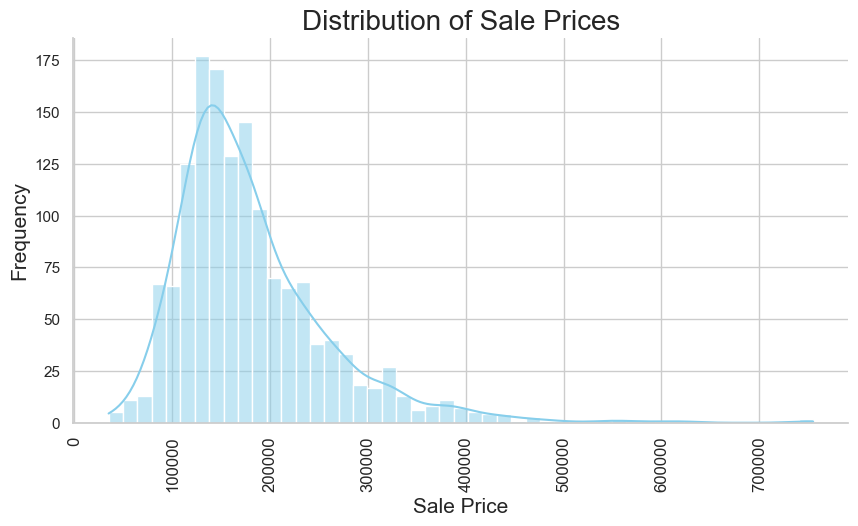

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set(style="whitegrid")

plt.figure(figsize=(10, 5))
sns.histplot(df['SalePrice'], kde=True, color='skyblue')
plt.title('Distribution of Sale Prices', fontsize=20)
plt.xlabel('Sale Price', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.xticks(rotation=90, fontsize=12)
sns.despine()

plt.show()

# Profiling

In [12]:
# from ydata_profiling import ProfileReport
# in case of error: pip install typing_extensions==4.7.1 --upgrade
# profile = ProfileReport(df, title="Profiling Report")

# profile.to_file("reports/data_report.html")

# Missing Values

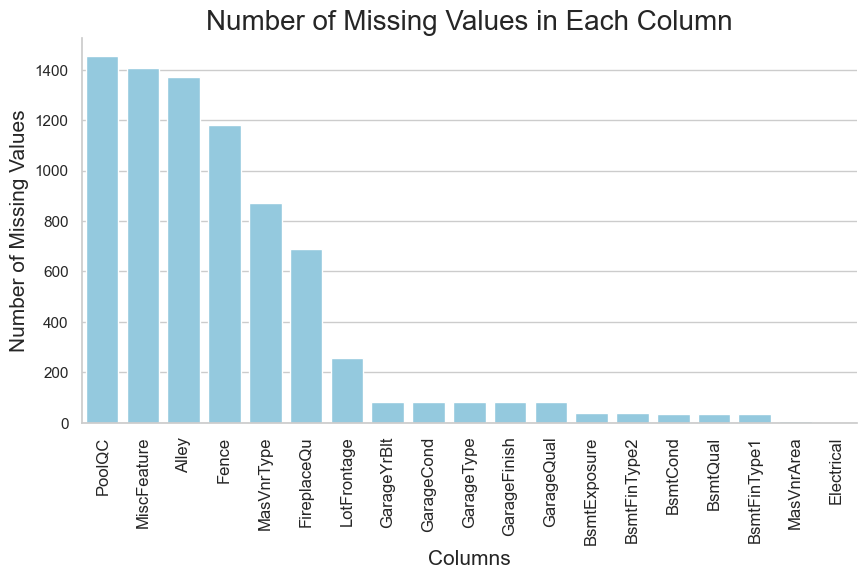

In [13]:
missing_values = df.isnull().sum().sort_values(ascending=False)
missing_values = missing_values[missing_values > 0]


sns.set(style="whitegrid")
plt.figure(figsize=(10, 5))
sns.barplot(x=missing_values.index, y=missing_values.values, color='skyblue')

plt.title('Number of Missing Values in Each Column', fontsize=20)
plt.xlabel('Columns', fontsize=15)
plt.ylabel('Number of Missing Values', fontsize=15)
plt.xticks(rotation=90, fontsize=12)
sns.despine()
plt.show()

In [14]:
# PoolQC            1453    – code as 'absence'
# MiscFeature       1406    – code as 'absence'
# Alley             1369    – code as 'absence'
# Fence             1179    – code as 'absence'
# MasVnrType        872     – code as 'absence'
# FireplaceQu       690     – code as 'absence'
# GarageType        81      – code as 'absence'
# GarageCond        81      – code as 'absence'
# GarageFinish      81      – code as 'absence'
# GarageQual        81      – code as 'absence'
# BsmtFinType2      38      – code as 'absence'
# BsmtExposure      38      – code as 'absence'
# BsmtQual          37      – code as 'absence'
# BsmtCond          37      – code as 'absence'
# BsmtFinType1      37      – code as 'absence'
# ----------------------------------------------
# GarageYrBlt       81      – fill with YearBuilt
# ----------------------------------------------
# Electrical        1       – fill in with the most frequently occurring value in the column
# MasVnrArea        8       – fill in with the most frequently occurring value in the column
# LotFrontage       259     – fill in with the most frequently occurring value in the column

In [15]:
df = _fill_missing_values(df=df)

# Numerical Features Histograms

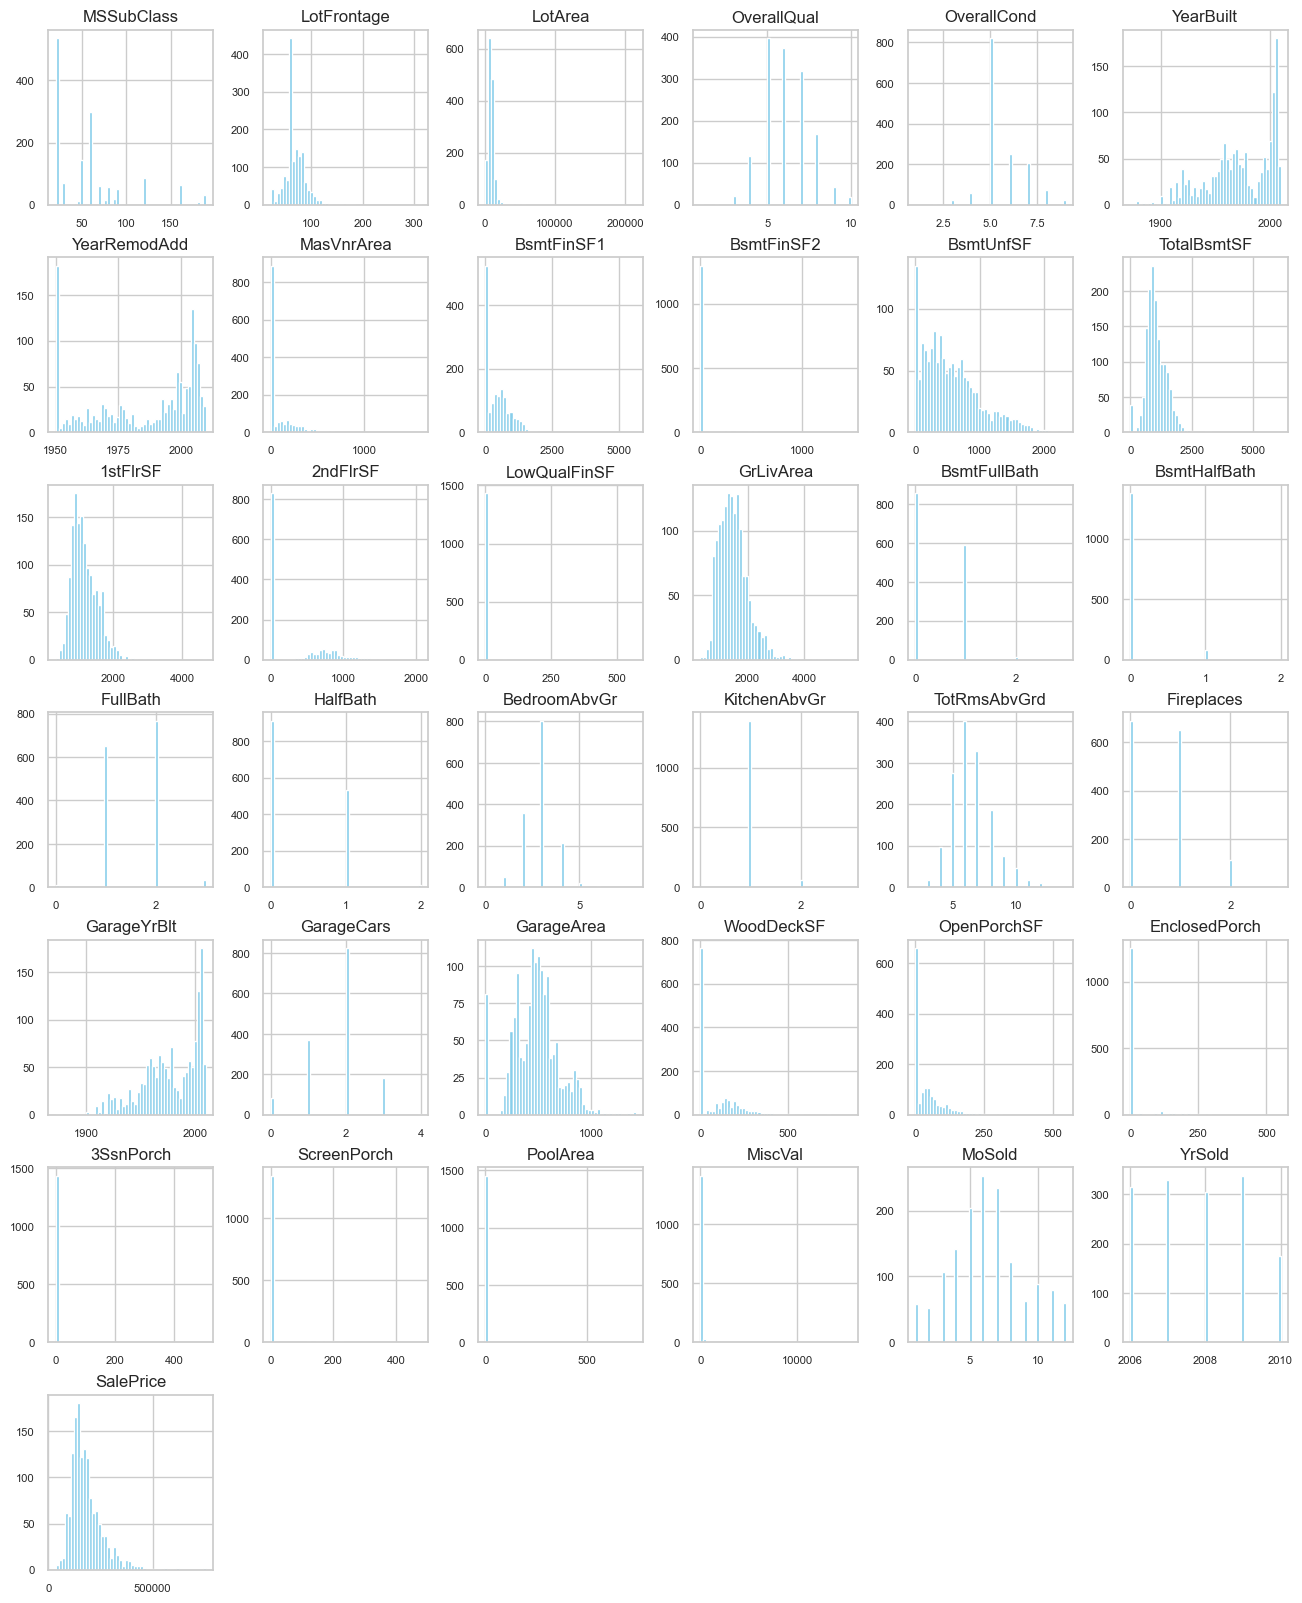

In [16]:
(df
    .select_dtypes(
        include=[np.number])
    .hist(
        figsize=(16, 20), 
        bins=50, 
        xlabelsize=8,
        ylabelsize=8,
        color='skyblue')
);

## Engineered Features 

In [17]:
df = _feature_engineering(df=df)

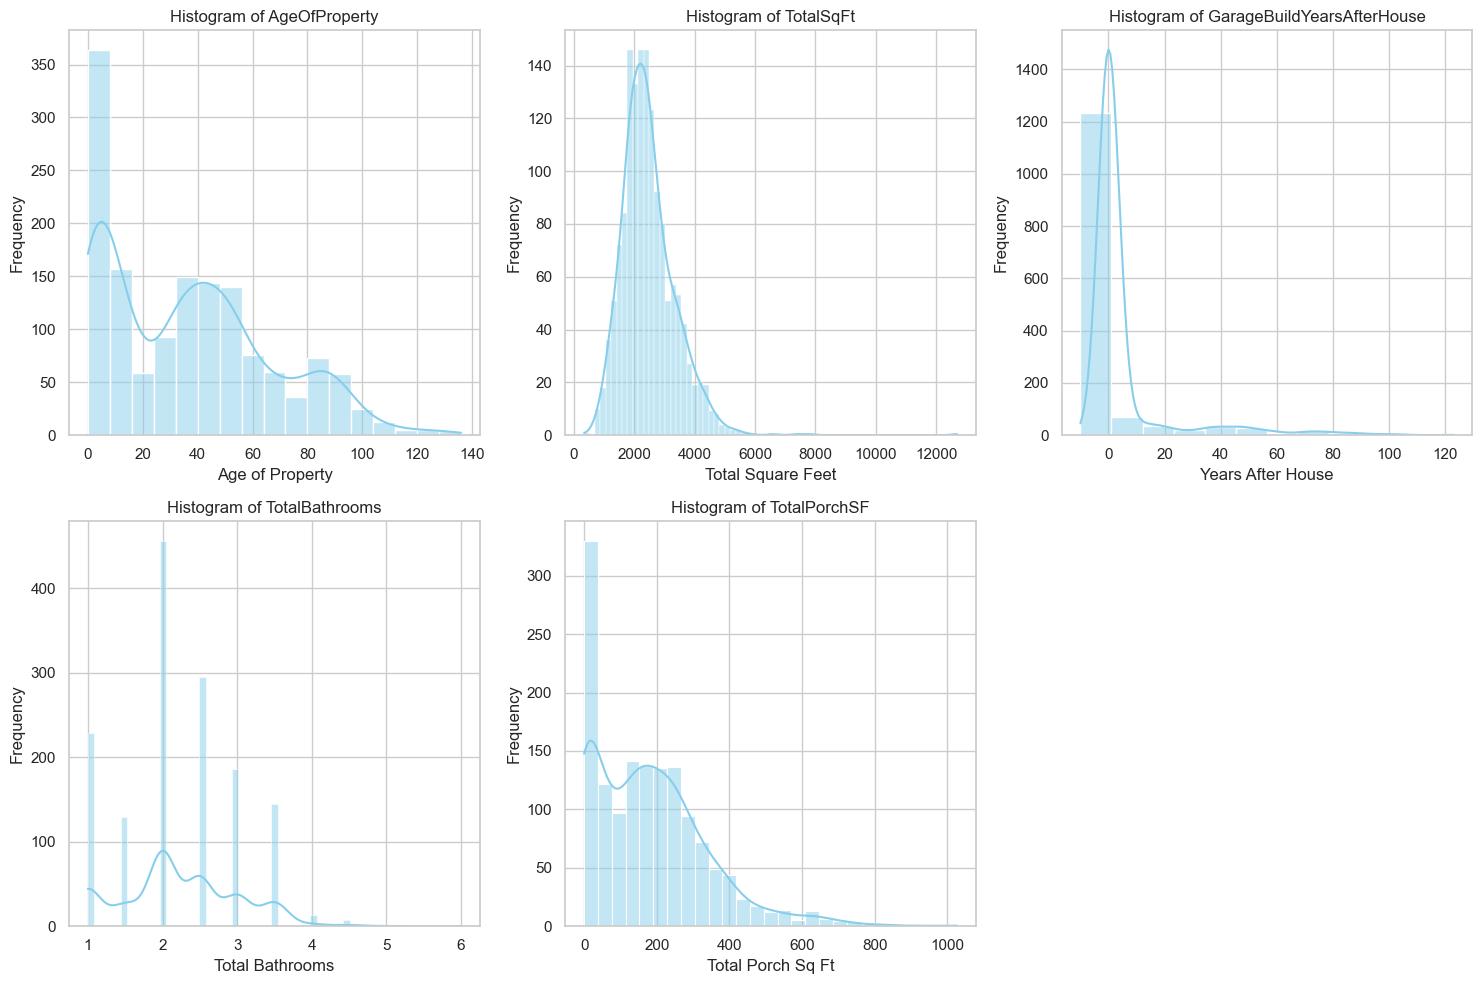

In [18]:
# Setting the style
sns.set(style="whitegrid")

# Creating figure and axes for 5 plots
fig, axs = plt.subplots(2, 3, figsize=(15, 10))  # 2 rows, 3 columns

# Histogram for 'AgeOfProperty'
sns.histplot(df['AgeOfProperty'], ax=axs[0, 0], color='skyblue', kde=True)
axs[0, 0].set_title('Histogram of AgeOfProperty')
axs[0, 0].set_xlabel('Age of Property')
axs[0, 0].set_ylabel('Frequency')

# Histogram for 'TotalSqFt'
sns.histplot(df['TotalSqFt'], ax=axs[0, 1], color='skyblue', kde=True)
axs[0, 1].set_title('Histogram of TotalSqFt')
axs[0, 1].set_xlabel('Total Square Feet')
axs[0, 1].set_ylabel('Frequency')

# Histogram for 'GarageBuildYearsAfterHouse'
sns.histplot(df['GarageBuildYearsAfterHouse'], ax=axs[0, 2], color='skyblue', kde=True)
axs[0, 2].set_title('Histogram of GarageBuildYearsAfterHouse')
axs[0, 2].set_xlabel('Years After House')
axs[0, 2].set_ylabel('Frequency')

# Histogram for 'TotalBathrooms'
sns.histplot(df['TotalBathrooms'], ax=axs[1, 0], color='skyblue', kde=True)
axs[1, 0].set_title('Histogram of TotalBathrooms')
axs[1, 0].set_xlabel('Total Bathrooms')
axs[1, 0].set_ylabel('Frequency')

# Histogram for 'TotalPorchSF'
sns.histplot(df['TotalPorchSF'], ax=axs[1, 1], color='skyblue', kde=True)
axs[1, 1].set_title('Histogram of TotalPorchSF')
axs[1, 1].set_xlabel('Total Porch Sq Ft')
axs[1, 1].set_ylabel('Frequency')

# Możesz ukryć ostatnią pustą os, jeśli chcesz
axs[1, 2].axis('off')

# Displaying the plots
plt.tight_layout()
plt.show()

## OneHot Encoded Features

In [19]:
df = _one_hot_encoding(df=df)

In [20]:
df.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


## Loading Data

# Data split - Train & Test

In [21]:
from data_utils import load_raw_data, load_training_data
df = load_raw_data(feature_engineering=True)
x_train, x_test, y_train, y_test = load_training_data(feature_engineering=True)

x_train.shape[0]=1168, x_test.shape[0]=292
y_train.shape[0]=1168, y_test.shape[0]=292


## Regression Modeling

In [22]:
from sklearn.linear_model import Lasso, ElasticNet, LinearRegression
from sklearn.metrics import r2_score

linear_regressor = LinearRegression()
linear_regressor.fit(x_train, y_train)

lasso_regressor = Lasso(random_state=0,
                        alpha=1)
lasso_regressor.fit(x_train, y_train)

elasticnet_regressor = ElasticNet(random_state=0,
                                  alpha=1, 
                                  l1_ratio=0.18)
elasticnet_regressor = elasticnet_regressor.fit(x_test, y_test)

C:\Users\ksobc\PycharmProjects\pricePrediction\.venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.351e+11, tolerance: 7.116e+08
  model = cd_fast.enet_coordinate_descent(
C:\Users\ksobc\PycharmProjects\pricePrediction\.venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.054e+11, tolerance: 2.083e+08
  model = cd_fast.enet_coordinate_descent(


In [23]:
lry_pred = linear_regressor.predict(x_test)
r2 = r2_score(y_test, lry_pred)

print(f'Linear Regressor - R²: {r2}')

lasso_pred = lasso_regressor.predict(x_test)
r2 = r2_score(y_test, lasso_pred)

print(f'Lasso Regressor - R²: {r2}')

elasticnet_pred = elasticnet_regressor.predict(x_test)
r2 = r2_score(y_test, elasticnet_pred)

print(f'Elastic Net Regressor - R²: {r2}')

Linear Regressor - R²: 0.8632522336053374
Lasso Regressor - R²: 0.8714917686416004
Elastic Net Regressor - R²: 0.9160512469402419


In [24]:
from sklearn.tree import DecisionTreeRegressor

dt_regressor = DecisionTreeRegressor(random_state=0,
                                     max_depth=10,
                                     min_samples_leaf=10,
                                     min_samples_split=50)
dt_regressor.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=10, min_samples_leaf=10, min_samples_split=50,
                      random_state=0)

In [25]:
dty_pred = dt_regressor.predict(x_test)

r2 = r2_score(y_test, dty_pred)

print(f'Decision Tree Regressor - R²: {r2}')

Decision Tree Regressor - R²: 0.8023393105151049


In [26]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

rf_regressor = RandomForestRegressor(n_estimators=1500,
                                     random_state=0,
                                     max_depth=17,
                                     min_samples_split=3,
                                     min_samples_leaf=10)
rf_regressor.fit(x_train, y_train)

gb_regressor = GradientBoostingRegressor(n_estimators=2000,
                                         learning_rate=0.05,
                                         max_depth=3,
                                         random_state=0,
                                         max_features='sqrt',
                                         min_samples_split=10,
                                         min_samples_leaf=13,
                                         loss='huber')
gb_regressor.fit(x_train, y_train)

GradientBoostingRegressor(learning_rate=0.05, loss='huber', max_features='sqrt',
                          min_samples_leaf=13, min_samples_split=10,
                          n_estimators=2000, random_state=0)

In [27]:
rfy_pred = rf_regressor.predict(x_test)
r2 = r2_score(y_test, rfy_pred)

print(f'Random Forest Regressor - R²: {r2}')

gby_pred = gb_regressor.predict(x_test)

r2 = r2_score(y_test, gby_pred)

print(f'Gradient Boosting Regressor- R²: {r2}')

Random Forest Regressor - R²: 0.8545071077601227
Gradient Boosting Regressor- R²: 0.8877559787287762


In [28]:
from sklearn.svm import SVR

svr_regressor = SVR(C=40,
                    gamma=0.0001,
                    degree=1,
                    kernel='linear')

svr_regressor.fit(x_train, y_train)
svry_pred = svr_regressor.predict(x_test)

In [29]:
r2 = r2_score(y_test, svry_pred)

print(f'Support Vector Regression - R²: {r2}')

Support Vector Regression - R²: 0.8228816855247434


In [30]:
import xgboost as xgb
from lightgbm import LGBMRegressor


lgb_regressor = LGBMRegressor(random_state=0,
                              num_leaves=11,
                              n_estimators=6000,
                              learning_rate=0.01,
                              verbose=10,
                              max_bin=129,
                              bagging_fraction=1,
                              bagging_freq=2,
                              bagging_seed=10,
                              feature_fraction=0.1,
                              feature_fraction_seed=1,
                              objective='regression')
lgb_regressor.fit(x_train, y_train)

xgb_regressor = xgb.XGBRegressor(objective ='reg:squarederror',
                                 max_depth = 2,
                                 alpha = 0.8298,
                                 random_state=0,
                                 n_estimators=3407,
                                 learning_rate=0.0377,
                                 min_child_weight=0.4565,
                                 subsample=0.9964,
                                 reg_lambda=0.0316,
                                 gamma=0.0009,
                                 colsample_bytree=0.2308,
                                 nthread=-1)

xgb_regressor.fit(x_train, y_train)

C:\Users\ksobc\PycharmProjects\pricePrediction\.venv\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\ksobc\PycharmProjects\pricePrediction\.venv\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


[LightGBM] [Warning] feature_fraction is set=0.1, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.1
[LightGBM] [Warning] bagging_fraction is set=1, subsample=1.0 will be ignored. Current value: bagging_fraction=1
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.1, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.1
[LightGBM] [Warning] bagging_fraction is set=1, subsample=1.0 will be ignored. Current value: bagging_fraction=1
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Debug] Dataset::GetMultiBinFromSparseFeatures: sparse rate 0.927575
[LightGBM] [Debug] Dataset::GetMultiBinFromAllFeatures: sparse rate 0.676023
[LightGBM] [Debug] init for col-wise cost 0.005077 seconds, init for row-

XGBRegressor(alpha=0.8298, base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.2308, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0.0009, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.0377, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=2, max_leaves=None,
             min_child_weight=0.4565, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=3407, n_jobs=None, nthread=-1, ...)

In [31]:
lgb_pred = lgb_regressor.predict(x_test)
r2 = r2_score(y_test, lgb_pred)

print(f'LightGB - R²: {r2}')

xgby_pred = xgb_regressor.predict(x_test)
r2 = r2_score(y_test, xgby_pred)

print(f'XGBoost - R²: {r2}')

[LightGBM] [Warning] feature_fraction is set=0.1, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.1
[LightGBM] [Warning] bagging_fraction is set=1, subsample=1.0 will be ignored. Current value: bagging_fraction=1
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
LightGB - R²: 0.8901789278156029
XGBoost - R²: 0.929366564155859


# Final Results of each model

The R² metric, also known as the coefficient of determination, is a statistical measure that represents the proportion of variance for the dependent variable that's explained by an independent variable or variables in a regression model. It ranges from 0 to 1, where a higher value generally indicates a better fit of the model to the data. An R² of 1 indicates that the regression model perfectly predicts the dependent variable, while an R² of 0 indicates that the model does not explain any of the variability of the dependent variable around its mean.

Linear Regressor - R²: 0.8632

Elastic Net Regressor - R²: 0.9161

Lasso Regressor - R²: 0.8715

Decision Tree Regressor - R²: 0.8023

Random Forest Regressor - R²: 0.8545

Gradient Boosting Regressor- R²: 0.8878

Support Vector Regression - R²: 0.8228

LightGB - R²: 0.8902

XGBoost - R²: 0.9293

Conclusion:
The XGBoost model presented the best result with an R² score of 0.9293, indicating its ability to explain about 92.93% of the variance in the target variable.